Upload:
* latentStates.npz
* obsKeys.npz
* uniqueStates.npz

* latentStatespt.npz
* obsKeyspt.npz
* uniqueStatespt.npz

#Libraries

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mode
from scipy.io import loadmat
from scipy.io import savemat
from math import *
from sklearn.metrics import confusion_matrix
import h5py as h5
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

import calculate_metrics from CalculateMetrics
import GetInferredStates from GetInferredStates

#Loading Data

In [ ]:
fs = 1000
window_length = fs*2
epoch_length = int(window_length/fs)

In [ ]:
latent_states = np.load('latentStates.npz')     # data from the training
unique_states = np.load('uniqueStates.npz')
obs_keys = np.load('obsKeys.npz')

latent_states_pt = np.load('latentStatespt.npz')  # data from your run (rename with _pt)
unique_states_pt = np.load('uniqueStatespt.npz')
obs_keys_pt = np.load('obsKeyspt.npz')

In [ ]:
inferredStates = latent_states['inferredStates']
uniqueStates = unique_states['uniqueStates']
obsKeys = obs_keys['obsKeys']

manualStates = inferredStates[:, 1]
latentStates = inferredStates[:, 0]

nLS = uniqueStates.shape[0]
LS = [f"LS-{i+1}" for i in range(nLS)]

In [ ]:
inferredStates_pt = latent_states_pt['inferredStates']
uniqueStates_pt = unique_states_pt['uniqueStates']
obsKeys_pt = obs_keys_pt['obsKeys']

manualStates_pt = inferredStates_pt[:, 1]
latentStates_pt = inferredStates_pt[:, 0]

nLS_pt = uniqueStates_pt.shape[0]
LS_pt = [f"LS-{i+1}" for i in range(nLS_pt)]

In [ ]:
inferredStates.shape, uniqueStates.shape, manualStates.shape, latentStates.shape, obsKeys.shape

((608100, 2), (102, 23), (608100,), (608100,), (608100, 5))

In [ ]:
inferredStates_pt.shape, uniqueStates_pt.shape, manualStates_pt.shape, latentStates_pt.shape, obsKeys_pt.shape

((5396, 2), (54, 23), (5396,), (5396,), (5396, 5))

In [ ]:
uniqueStatesStr = [''.join(map(str, row[13:].astype(int))) for row in uniqueStates]
uniqueStatesStr_pt = [''.join(map(str, row[13:].astype(int))) for row in uniqueStates_pt]

------
---
---
#Confusion Matrix

In [ ]:
inferred_states = GetInferredStates(uniqueStates, obsKeys, uniqueStatesStr, obsKeys_pt, uniqueStates_pt, uniqueStatesStr_pt)  # Get inferred states (1 3 or 5)

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
#@title Confusion matrix
conf_matrix = confusion_matrix(inferredStates_pt[:,1], inferred_states, labels=[1, 3, 5])

accuracy, precision, recall, f1_score, specificity = calculate_metrics(conf_matrix)
metrics = np.stack((accuracy, precision, recall, f1_score, specificity), axis=1)

conf_matrix = pd.DataFrame(conf_matrix, columns=['P Wake', 'P NREM', 'P REM'], index=['T Wake', 'T NREM', 'T REM'])
metrics = pd.DataFrame(metrics.T, columns=['Wake', 'NREM', 'REM'], index=['Accuracy','Precision', 'Recall', 'F1 score', 'Specificity'])

print('Confusion Matrix for all RGS positive datapoints')
print('')
print(conf_matrix)
print('')
print(metrics)

Confusion Matrix for all RGS positive datapoints

        P Wake  P NREM  P REM
T Wake    3336      93      4
T NREM     218    1302      8
T REM        1       0    173

                 Wake      NREM       REM
Accuracy     0.938462  0.937877  0.997468
Precision    0.938397  0.933333  0.935135
Recall       0.971745  0.852094  0.994253
F1 score     0.954780  0.890866  0.963788
Specificity  0.871328  0.974217  0.997581


In [ ]:
#@title Any new latent states?
i = 0                                     # Check if any latent states were 'discovered' in the posttrial that weren't found in the training
for n in uniqueStatesStr_pt:
  if n not in uniqueStatesStr:
    i += 1
    print(n)
print('Number of new latent states:', i)

0111100010
0111101010
1110110000
1111010000
Number of new latent states: 4


In [ ]:
#@title Save confusion matrix
conf_matrix.to_csv('RGS_treated_pt5_conf_mat.csv')
metrics.to_csv('RGS_treated_pt5_metrics.csv')

print('Saved')

Saved


---
---
---
# Hypnograms





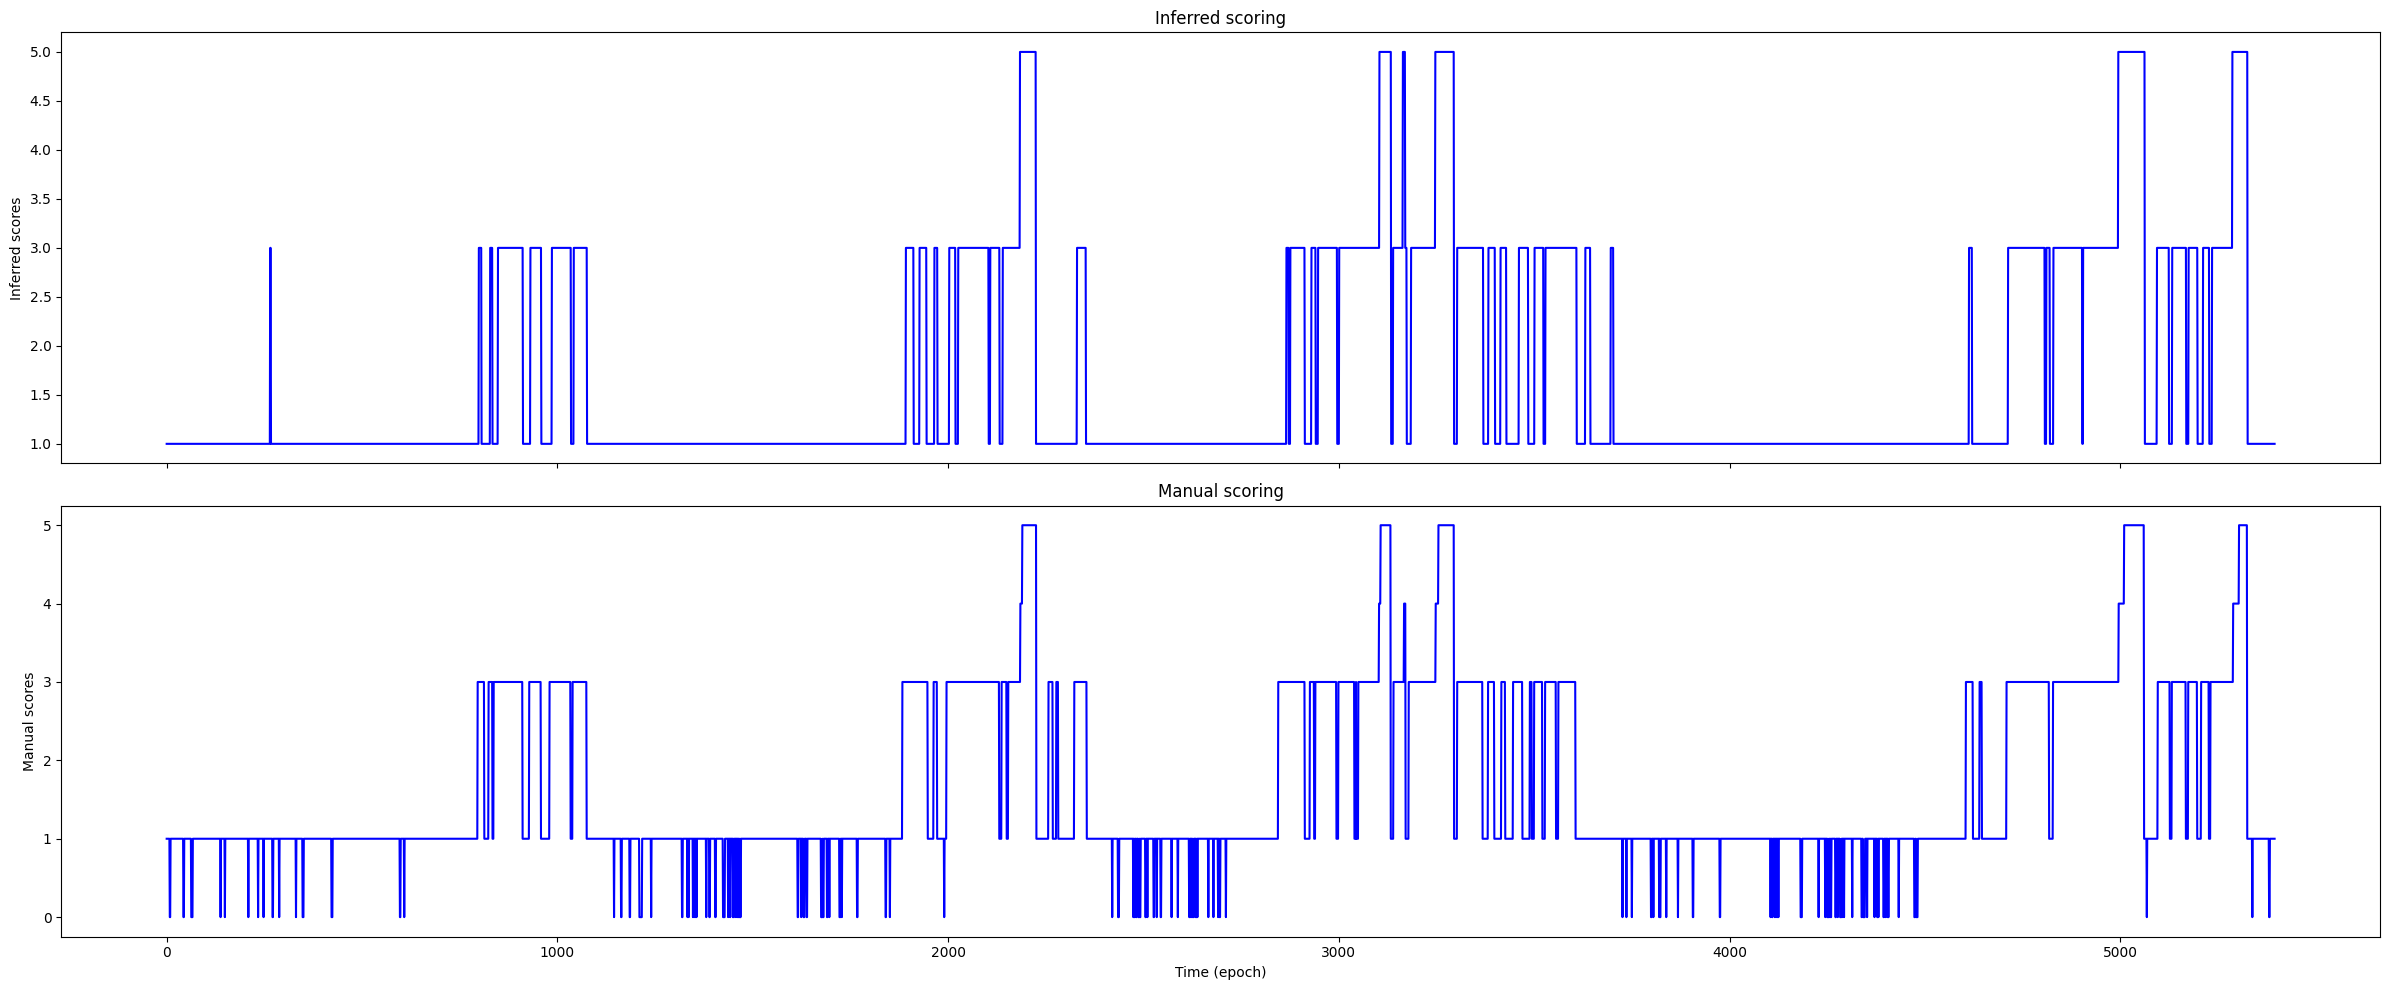

In [ ]:
#@title Hypnos

times = np.arange(0,len(inferred_states))
fig, axs = plt.subplots(2, 1, figsize=(24, 10), sharex = True)

axs[0].plot(times, inferred_states[times], color='blue')    #manual scoring
axs[0].set_ylabel('Inferred scores')
axs[0].set_title('Inferred scoring')

axs[1].plot(times, inferredStates_pt[:,1][times], color='blue')    #manual scoring
axs[1].set_xlabel('Time (epoch)')
axs[1].set_ylabel('Manual scores')
axs[1].set_title('Manual scoring')

# Display the plot
plt.tight_layout()
plt.savefig('RGS_treated_pt5_hypnograms.svg', format = 'svg')
plt.show()